# <p style="padding:17px;background-color:#89b8c4;margin:0;color:Black;border:1px outline #0d0c0d;font-family:Hiragino Sans;font-weight: bold;font-size:80%;overflow:hidden;font-weight:500"> **Text Analysis of the Holy Quran: Reflection & Insights**</p>


### **The Holy Quran:**
The Holy Quran, Kalaam  of that Lord عَزَّوَجَلَّ Who is the only Deity, the only Creator of the entire universe. He عَزَّوَجَلَّ revealed the Quran to the Holy Prophet صَلَّى اللهُ عَلَيْهِ وَاٰلِهٖ وَسَلَّم . The blessed revelation began in the sacred month of Ramadan.

##### The Holy Book is divided into 30 parts, 114 Chapters and 6,236 verses.

#### **This notebook aims to perform a comprehensive text analysis of the Quran and Data Exploration & Analysis to find insights from the Holy Quran.**

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import plotly.io as pio
from collections import Counter
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from PIL import Image
import numpy as np
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
import arabic_reshaper 
from bidi.algorithm import get_display
from wordcloud import WordCloud, ImageColorGenerator

## Loading Dataset

In [2]:
df = pd.read_csv("C:/Users/Maryam/Desktop/ML Projects/The Quran Dataset.csv")

In [3]:
df['juz_name'] = df['juz_name'].str.replace(" ","-")

In [4]:
df.head(5)

,surah_no,surah_name_en,surah_name_ar,surah_name_roman,ayah_no_surah,ayah_no_quran,ayah_ar,ayah_en,ruko_no,juz_no,juz_name,manzil_no,hizb_quarter,total_ayah_surah,total_ayah_quran,place_of_revelation,sajah_ayah,sajdah_no,no_of_word_ayah,list_of_words
0,1,The Opener,الفاتحة,Al-Fatihah,1,1,بِسْمِ ٱللَّهِ ٱلرَّحْمَٰنِ ٱلرَّحِيمِ,"In the Name of Allah—the Most Compassionate, M...",1,1,Alif-Lam-Meem,1,1,7,6236,Meccan,False,NaN,4,"[بِسْمِ,ٱللَّهِ,ٱلرَّحْمَٰنِ,ٱلرَّحِيمِ]"
1,1,The Opener,الفاتحة,Al-Fatihah,2,2,ٱلْحَمْدُ لِلَّهِ رَبِّ ٱلْعَٰلَمِينَ,"All praise is for Allah—Lord of all worlds,",1,1,Alif-Lam-Meem,1,1,7,6236,Meccan,False,NaN,4,"[ٱلْحَمْدُ,لِلَّهِ,رَبِّ,ٱلْعَٰلَمِينَ]"
2,1,The Opener,الفاتحة,Al-Fatihah,3,3,ٱلرَّحْمَٰنِ ٱلرَّحِيمِ,"the Most Compassionate, Most Merciful,",1,1,Alif-Lam-Meem,1,1,7,6236,Meccan,False,NaN,2,"[ٱلرَّحْمَٰنِ,ٱلرَّحِيمِ]"
3,1,The Opener,الفاتحة,Al-Fatihah,4,4,مَٰلِكِ يَوْمِ ٱلدِّينِ,Master of the Day of Judgment.,1,1,Alif-Lam-Meem,1,1,7,6236,Meccan,False,NaN,3,"[مَٰلِكِ,يَوْمِ,ٱلدِّينِ]"
4,1,The Opener,الفاتحة,Al-Fatihah,5,5,إِيَّاكَ نَعْبُدُ وَإِيَّاكَ نَسْتَعِينُ,You ˹alone˺ we worship and You ˹alone˺ we ask ...,1,1,Alif-Lam-Meem,1,1,7,6236,Meccan,False,NaN,4,"[إِيَّاكَ,نَعْبُدُ,وَإِيَّاكَ,نَسْتَعِينُ]"


In [5]:
df.shape

(6236, 20)

The dataset has `6236` rows and `21` columns.

# **Exploratory Data Analyis: Insights from the Holy Quran**

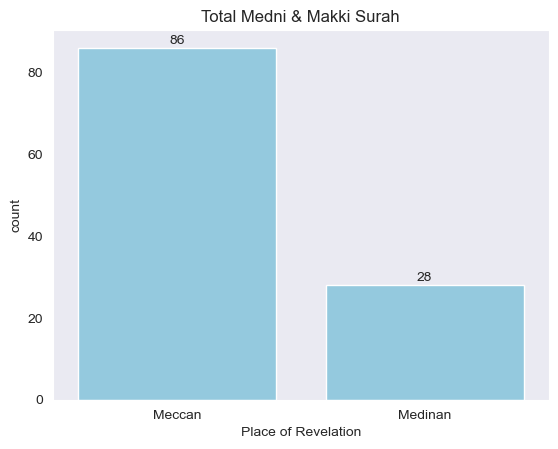

In [6]:
value_count = df.drop_duplicates(subset=['surah_no', 'place_of_revelation'])
sns.set_style('dark')
place_of_revelation = value_count['place_of_revelation'].value_counts()

# px.bar(place_of_revelation, x=place_of_revelation.index, y=place_of_revelation.values, width=0.2)
# sns.set(style="whitegrid")
ax = sns.countplot(x=value_count['place_of_revelation'], color='skyblue')
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., 
                    p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.xlabel("Place of Revelation")
plt.title("Total Medni & Makki Surah");

##### From 114 Surahs of the Quran, 86 are Makki Surahs and 28 are Madni Surahs

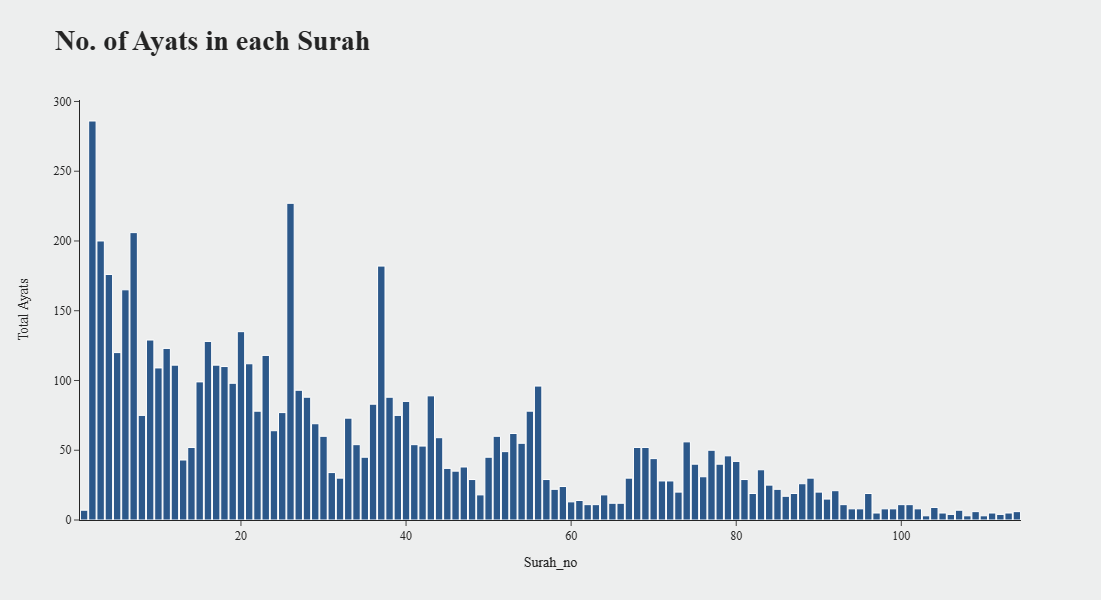

In [7]:
import plotly.express as px

surah_count = df.groupby(['surah_no', 'surah_name_roman'])['total_ayah_surah'].count().reset_index()
fig =px.bar(surah_count, x='surah_no', y='total_ayah_surah', title='No. of Ayats in each Surah', width=1000, 
            height=600,labels={'surah_no': 'Surah_no', 'total_ayah_surah':'Total Ayats', 'surah_name_roman':'Surah Name'},
             hover_data={'surah_name_roman': True, 'total_ayah_surah': True})
fig.update_layout(title="<b>No. of Ayats in each Surah<b>", 
                  font_family="San Serif",
                  bargap=0.1,
                  barmode='group',
                  titlefont={'size': 28},
                  template='simple_white',
                  showlegend=True,
                  autosize=False,
                  width=1000,
                  height=600,
                  paper_bgcolor='#edeeee',
                  plot_bgcolor='#edeeee',
                  legend=dict(
                  orientation="v", 
                      y=1, 
                      yanchor="top", 
                      x=1.250, 
                      xanchor="right",))                

fig.update_traces(marker=dict(line=dict(width=1)), marker_color='#2c588a') 
fig.show()

##### `Al-Baqarah(The Cow)` is the second and longest Chapter(Surah) of the Quran. It consists of 286 verses(Ayats).

##### `Al-Asr, Al-Kawthar and Al-Nasr` are the shortest Chapters of the Quran, consisting of 3 verses.


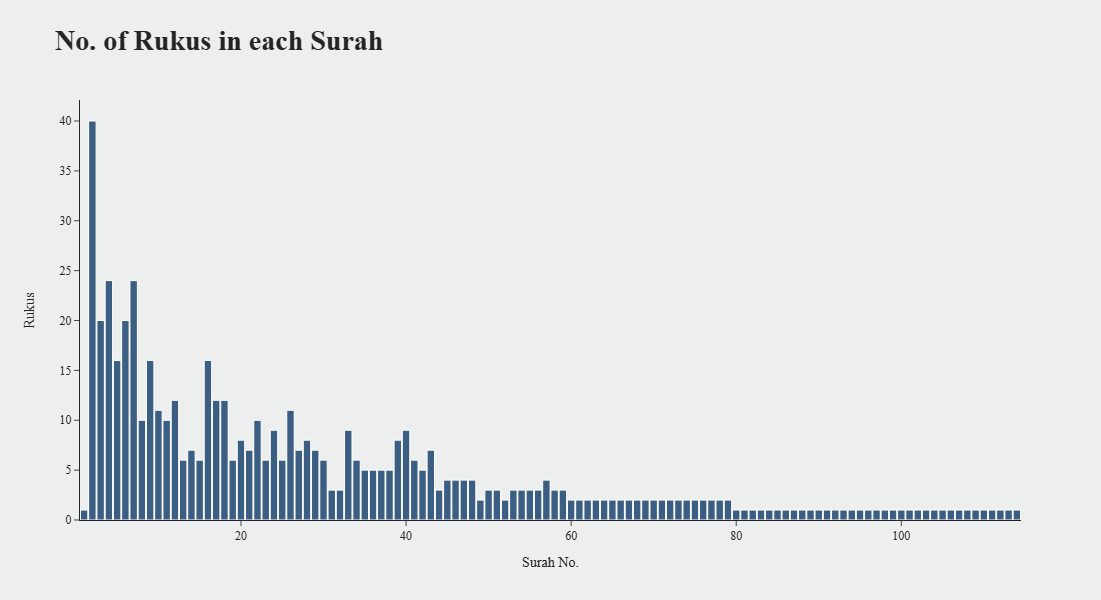

In [8]:
ruko_surah = df.drop_duplicates(subset=['surah_no', 'ruko_no'])
ruko_count = ruko_surah.groupby(['surah_no', 'surah_name_roman'])['ruko_no'].count().reset_index()
fig = px.bar(ruko_count, x='surah_no', y='ruko_no', title='No. of Rukus in each Surah',width=1000, 
            height=600, labels={'surah_no': 'Surah No.','surah_name_roman':'Surah Name', 'ruko_no': 'Rukus'},
             hover_data={'surah_name_roman': True, 'ruko_no': True},)
fig.update_layout(title="<b>No. of Rukus in each Surah<b>", 
                  font_family="San Serif",
                  bargap=0.1,
                  barmode='group',
                  titlefont={'size': 28},
                  template='simple_white',
                  showlegend=True,
                  autosize=False,
                  width=1000,
                  height=600,
                  paper_bgcolor='#edeeee',
                  plot_bgcolor='#edeeee',
                  legend=dict(
                  orientation="v", 
                      y=1, 
                      yanchor="top", 
                      x=1.250, 
                      xanchor="right",))                

fig.update_traces(marker=dict(line=dict(width=1)), marker_color='#3c5e82') 
fig.show()

##### As Al-Baqarah is the longest Chapter, it consists of 40 Rukus.

##### Surah 80 to 114 consists of only 1 Ruku.

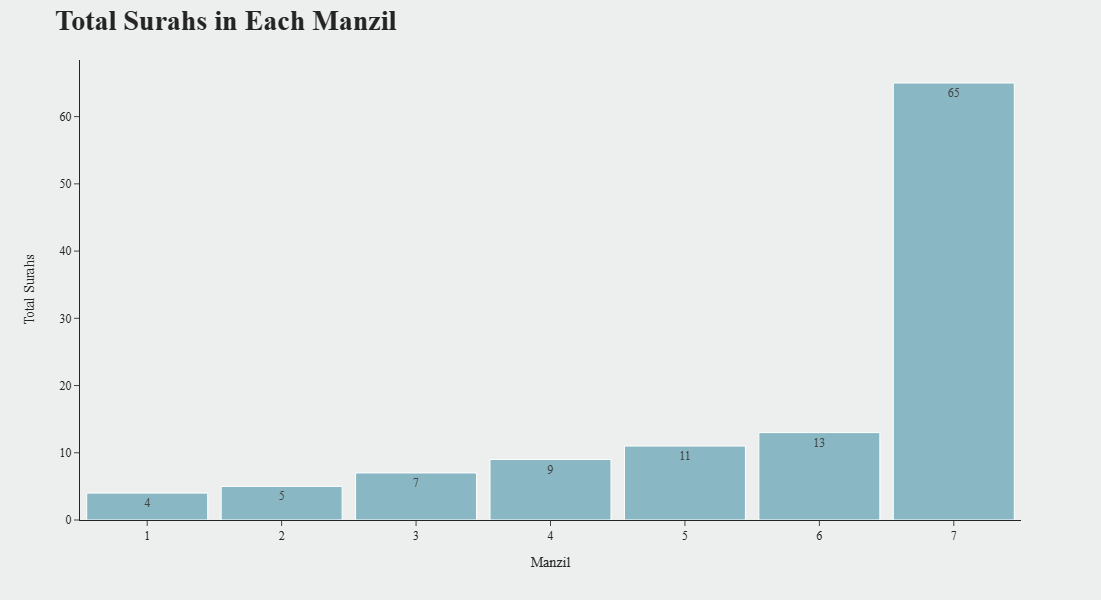

In [50]:
manzil_surah= df.drop_duplicates(subset=['manzil_no','surah_no'])
manzil_count= manzil_surah.groupby('manzil_no')['surah_no'].count()
fig = px.bar(manzil_count, x=manzil_count.index, y=manzil_count.values, width=1000, height=600,
            labels={'manzil_no':"Manzil", 'y':"Total Surahs"}, text_auto=True) 
fig.update_layout(title="<b>Total Surahs in Each Manzil<b>", 
                  font_family="San Serif",
                  bargap=0.1,
                  barmode='group',
                  titlefont={'size': 28},
                  template='simple_white',
                  showlegend=True,
                  autosize=False,
                  width=1000,
                  height=600,
                  paper_bgcolor='#edeeee',
                  plot_bgcolor='#edeeee',
                  legend=dict(
                  orientation="v", 
                      y=1, 
                      yanchor="top", 
                      x=1.250, 
                      xanchor="right",))                

fig.update_traces(marker=dict(line=dict(width=1)), marker_color='#89b8c4') 
fig.show()

##### The Quran consists of Seven manzils(Seven Equal Sections and Portion of the Quran)

##### Seventh Mazil consists of 65 Surahs.

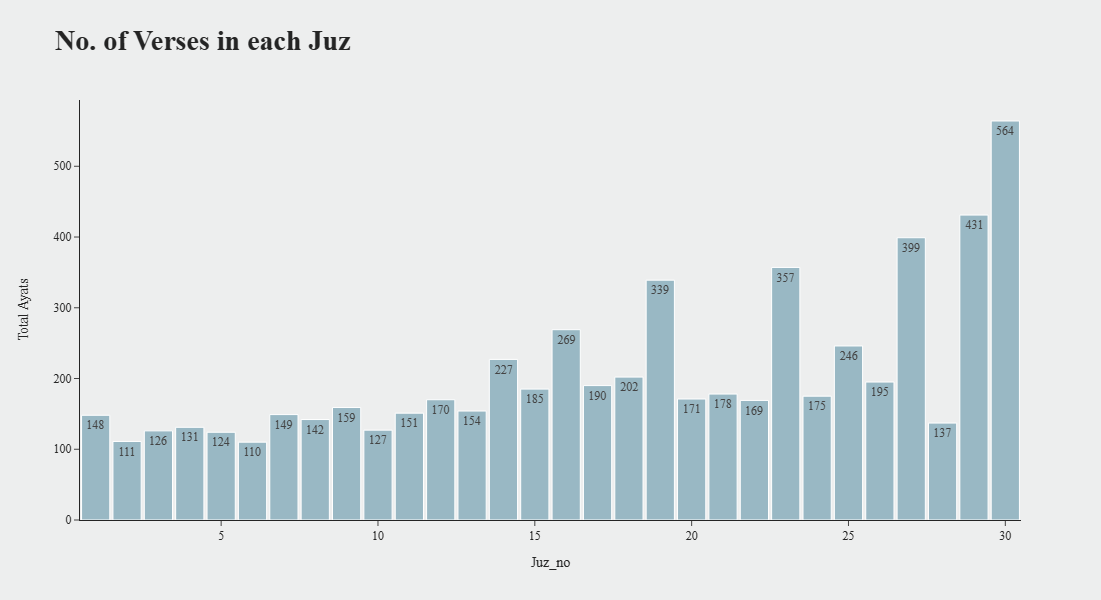

In [49]:
juz_ayah = df.groupby(['juz_no','juz_name'])['ayah_no_surah'].count().reset_index()

fig =px.bar(juz_ayah, x='juz_no', y='ayah_no_surah', title='No. of Ayats in each Juz', width=1000, text_auto=True,
            height=600,labels={'juz_no': 'Juz_no ','juz_name':'Juz Name ', 'ayah_no_surah':'Total Ayats'},
             hover_data={'juz_name': True, 'ayah_no_surah': True})
fig.update_layout(title="<b>No. of Verses in each Juz<b>", 
                  font_family="San Serif",
                  bargap=0.1,
                  barmode='group',
                  titlefont={'size': 28},
                  template='simple_white',
                  showlegend=True,
                  autosize=False,
                  width=1000,
                  height=600,
                  paper_bgcolor='#edeeee',
                  plot_bgcolor='#edeeee',
                  legend=dict(
                  orientation="v", 
                      y=1, 
                      yanchor="top", 
                      x=1.250, 
                      xanchor="right",))                

fig.update_traces(marker=dict(line=dict(width=1)), marker_color='#99b8c4') 
fig.show()

##### Juz(Amma-Yatasa'aloon), the thirtieth Parah consists of 36 Chapters. Number of verses of this section is 564.

In [11]:
# df.groupby("surah_name_en")['sajah_ayah'].
sajdah_quran=df[df['sajah_ayah']==True][['surah_no','surah_name_roman','ayah_no_surah']].reset_index(drop=True)
sajdah_quran.style\
    .set_caption('Sajdah Places in Quran').set_table_styles([{'selector': 'caption', 
                                                        'props': [('font-size', '18px')]}]).set_properties(**{'font-size': '12pt', 
                                                                                                              'border': '1px solid black', 'text-align': 'center'})# Hide index column
   

,surah_no,surah_name_roman,ayah_no_surah
0,7,Al-A'raf,206
1,13,Ar-Ra'd,15
2,16,An-Nahl,50
3,17,Al-Isra,109
4,19,Maryam,58
5,22,Al-Hajj,18
6,22,Al-Hajj,77
7,25,Al-Furqan,60
8,27,An-Naml,26
9,32,As-Sajdah,15


##### There are a total of 15 Sajdah Ayaat (verses of prostration) in the Quran. When a Muslim recites these verses, it is recommended to perform the Sajdah (prostration) of gratitude or reverence.

# Data Preprocessing: Word Tokenization & Stop Words

### English text

In [12]:
en_stopwords = list(STOPWORDS)

In [13]:
en_stop_words = "C:/Users/Maryam/Desktop/ML Projects/stopwords-en.txt"
with open(en_stop_words, 'r', encoding='utf-8') as file:
    en_stop_words= [line.strip() for line in file]


In [14]:
def English_punctuation_stopwords(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Remove punctuation
    punctuation = ['—', '˹','.', '˺', '“', '”', '’']
    for mark in punctuation:
        words = [word.replace(mark, '') for word in words]
    no_punct = [word for word in words if word not in string.punctuation]


    en_stop_words = "C:/Users/Maryam/Desktop/ML Projects/stopwords-en.txt"
    with open(en_stop_words, 'r', encoding='utf-8') as file:
        en_stop_words= [line.strip() for line in file]


    no_stopword = [word for word in no_punct if word.lower() not in en_stop_words]

    # Reconstruct the text
    return ' '.join(no_stopword)


In [15]:
df['ayah_en_text'] = df['ayah_en'].apply(English_punctuation_stopwords)

### Arabic Text

In [16]:
stop_words_arabic = "C:/Users/Maryam/Desktop/ML Projects/list.txt"
with open(stop_words_arabic, 'r', encoding='utf-8') as file:
    arabic_stop_words= [line.strip() for line in file]
    arabic_stop_words = [get_display(arabic_reshaper.reshape(x)) for x in arabic_stop_words]

# **Reflection & Analysis**

In [17]:
whole_quran = ' '.join(df['ayah_en_text'])

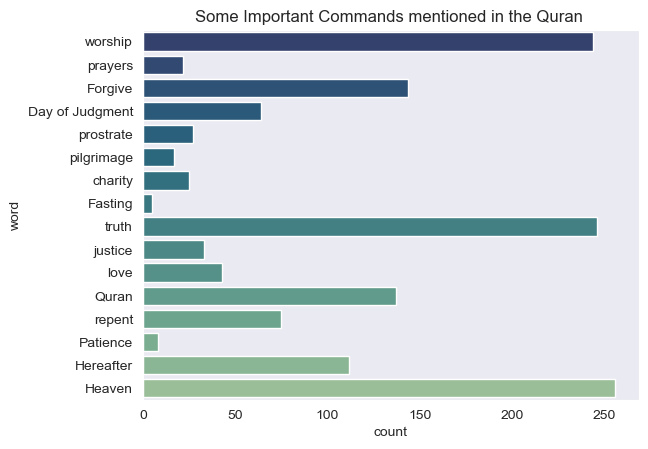

In [18]:
verse=' '.join(df['ayah_en'])
words_to_count = ['worship','prayers','Forgive','Day of Judgment','prostrate','pilgrimage','charity','Fasting',
                 'truth','justice','love','Quran','repent' ,'Patience','Hereafter', 'Heaven']

# Convert the verse to lowercase to make the search case-insensitive
verse = verse.lower()

# Count the occurrences of each word
word_counts = {word: verse.count(word.lower()) for word in words_to_count}
commands = pd.DataFrame(list(word_counts.items()), columns=['word', 'count'])
sns.barplot(data=commands, y='word', x='count', palette='crest_r')
plt.title("Some Important Commands mentioned in the Quran ");

##### Here are some significant terms that the Quran has emphasized. By adhering to these, we can strive to become better servants of Allah SWT.

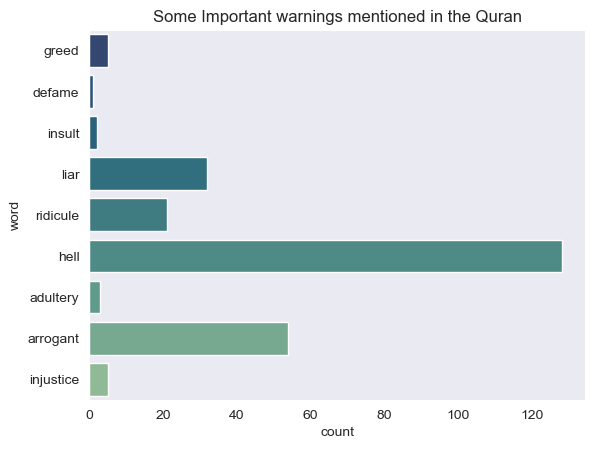

In [20]:
verse=' '.join(df['ayah_en'])
words_to_count = ['greed','defame','insult','liar','ridicule','hell','adultery','arrogant','injustice']

# Convert the verse to lowercase to make the search case-insensitive
verse = verse.lower()

# Count the occurrences of each word
word_counts = {word: verse.count(word.lower()) for word in words_to_count}
warns = pd.DataFrame(list(word_counts.items()), columns=['word', 'count'])
sns.barplot(data=warns, y='word', x='count', palette='crest_r')
plt.title("Some Important warnings mentioned in the Quran");

##### Some important terms the Quran has warns against for the betterment of our wordly life and hereafter.

# **Word Cloud**
Word Cloud aims to visually represent the most frequently occuring words.

I created the Word Cloud of the Entire Holy Quran, along with some my most favourite surahs.

## Word Cloud of the Entire Holy Quran

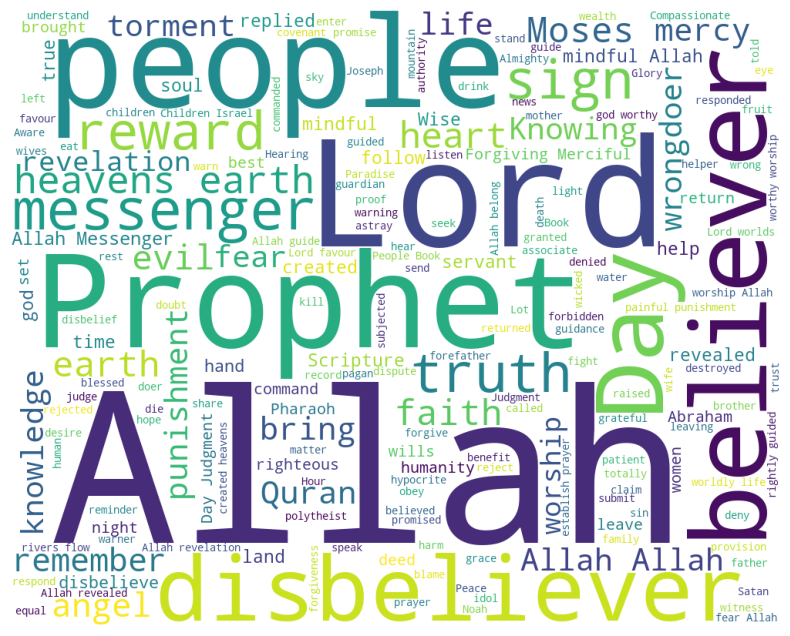

In [26]:
whole_quran = ' '.join(df['ayah_en_text'])
wc = WordCloud(width=1000, height=800, background_color='white', stopwords=en_stop_words,colormap='viridis').generate(whole_quran)
plt.figure(figsize=(10,8))
plt.imshow(wc)
plt.axis('off');
# plt.show()

In [27]:
top_words = Counter(word_tokenize(whole_quran))
# top_words_words, top_words_counts = zip(*top_words)

# fig = go.Figure([go.Bar(x=top_words_words, y=top_words_counts)])
# fig.update_layout(title='Top 10 Most Common Words', yaxis_title='Word', xaxis_title='Frequency')
# fig.show()

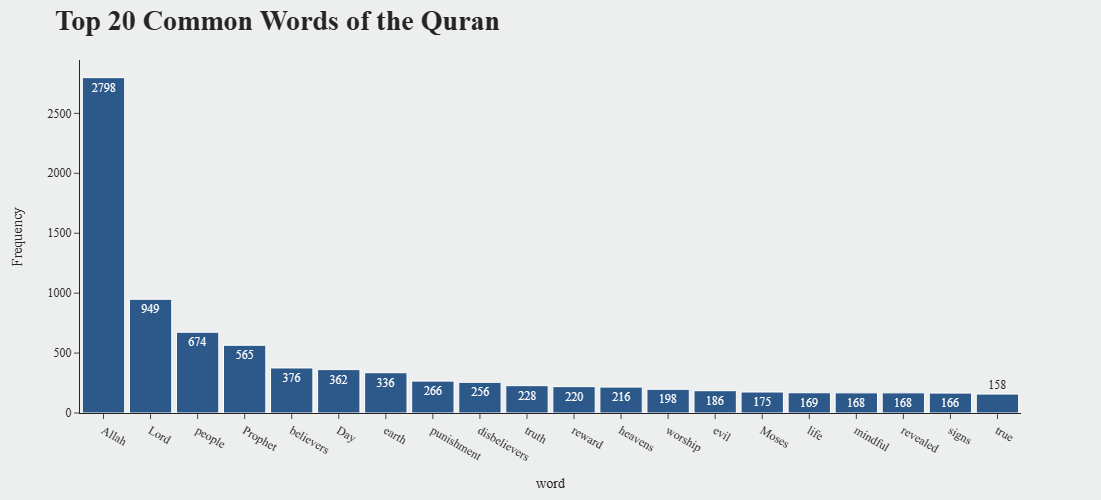

In [28]:
word_count= pd.DataFrame(top_words.items(), columns=['word','count'])
word_count = word_count.sort_values(by='count', ascending=False)
fig=px.bar(word_count.head(20), x='word', y='count',width=800, text_auto=True,
            height=500,labels={'count': 'Frequency', 'cord': 'Word'})
fig.update_layout(title="<b>Top 20 Common Words of the Quran<b>", 
                  font_family="San Serif",
                  bargap=0.1,
                  barmode='group',
                  titlefont={'size': 28},
                  template='simple_white',
                  showlegend=True,
                  autosize=False,
                  # width=1000,
                  # height=600,
                  paper_bgcolor='#edeeee',
                  plot_bgcolor='#edeeee',
                  legend=dict(
                  orientation="v", 
                      y=1, 
                      yanchor="top", 
                      x=1.250, 
                      xanchor="right",))                

fig.update_traces(marker=dict(line=dict(width=1)), marker_color='#2c588a') 
fig.show()

##### The plot represents the frequently occuring words in the Quran, most prominent topics and concepts emphasized in the Quran.
##### `Allah, Lord, people and Prophet` are frequently occuring in the Quran.

# Surah Rahman

In [29]:
surah_rahman = ' '.join(df[df['surah_no']==55]['ayah_en_text'])

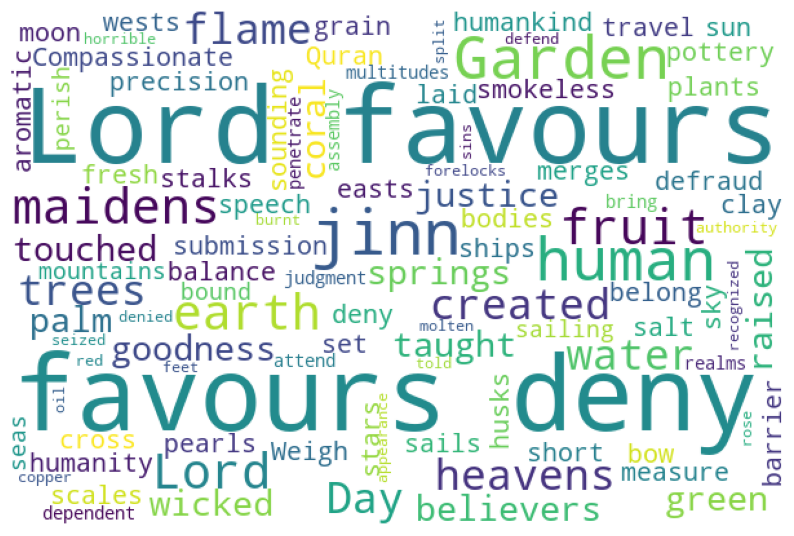

In [30]:
wc = WordCloud(width=600, height=400, max_words=100,background_color='white', stopwords=en_stop_words,colormap='viridis').generate(surah_rahman)
plt.figure(figsize=(10,8))
plt.imshow(wc)
plt.axis('off');
# plt.show()
# wc.to_file('wordcloud.png')

##### Ar- Rahman, the Most Compassionate. The most noteable Ayah of the Surah Ar-Rahman is `Which Of The Favors Of Your Lord Will You Deny?`

##### In this surah, Allah (SWT) describes the beautiful creations of Him, as well as His blessings that He is bestowing upon humans.

# Surah Yasin

In [113]:
surah_yasin = ' '.join(df[df['surah_no']==36]['ayah_en_text'])

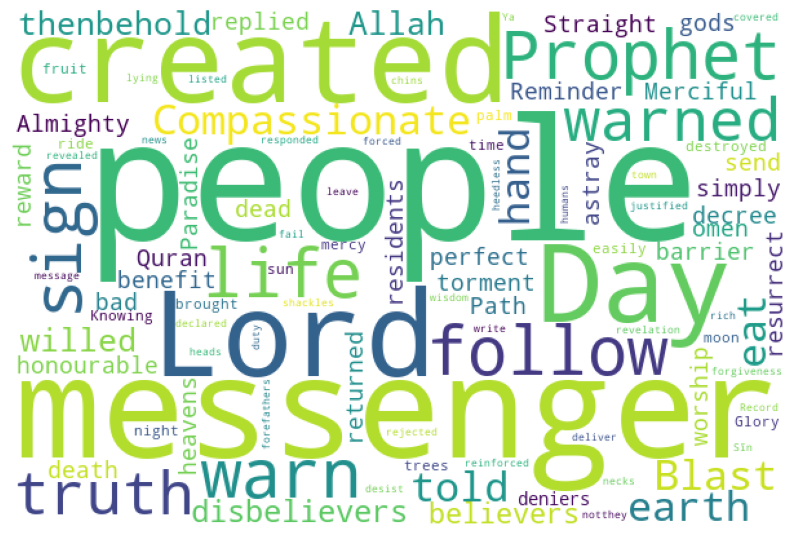

In [114]:
wc = WordCloud(width=600, height=400, max_words=100,background_color='white', stopwords=en_stop_words,colormap='viridis').generate(surah_yasin)
plt.figure(figsize=(10,8))
plt.imshow(wc)
plt.axis('off');
# plt.show()
# wc.to_file('wordcloud.png')

Surah Yasin is the heart of the Quran. Surah Yaseen narrates about the punishments that were suffered by nonbelievers and their children and generations further. The surah reiterates God’s sovereignty and the existence of Resurrection. 

## Word Cloud: Arabic

In [32]:
entire_quran= ' '.join(df['ayah_ar'])

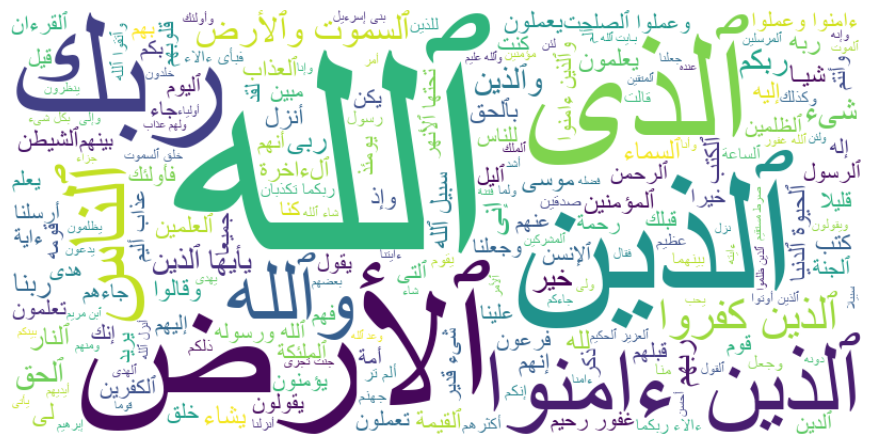

In [35]:
plt.figure(figsize=(11, 8))
wc = WordCloud(font_path='../input/arial-font/arial.ttf',
                stopwords=arabic_stop_words,width=800, height=400,colormap='viridis', 
                background_color='white')
wc.generate(get_display(arabic_reshaper.reshape(entire_quran)))
# plt.title(get_display(arabic_reshaper.reshape('الرحمن')), fontweight='bold')
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# Surah Yousaf

In [40]:
surah_yousaf= ' '.join(df[df['surah_no']==12]['ayah_ar'])

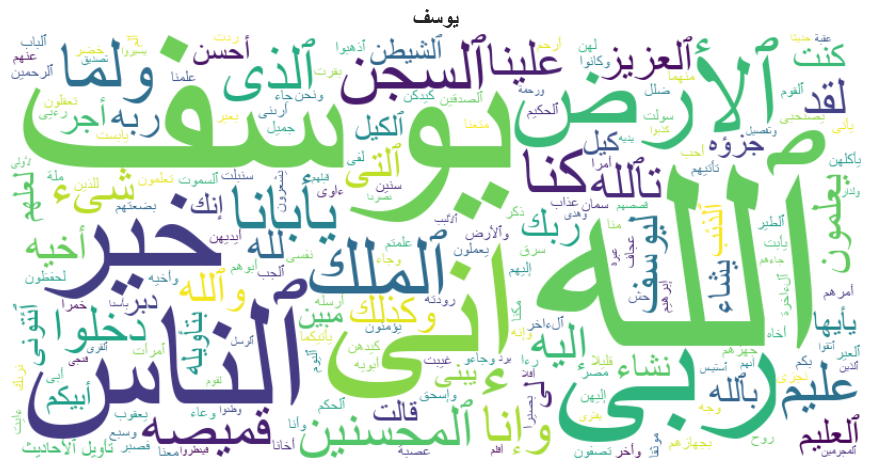

In [41]:
plt.figure(figsize=(11, 8))
wc = WordCloud(font_path='../input/arial-font/arial.ttf',
                stopwords=arabic_stop_words,width=800, height=400,colormap='viridis', 
                background_color='white')
wc.generate(get_display(arabic_reshaper.reshape(surah_yousaf)))
plt.title(get_display(arabic_reshaper.reshape('يوسف')), fontweight='bold',fontsize=16)
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

The story of Prophet Yusuf is fully narrated in the Quran. He went through many harships which all passed with patiece and piety. **The story of prophet Yusuf started by being thrown into a well and finally becoming in a great position in Egypt.**

`Allah` and `Yusuf` are frequently occurring words in Surah Yusuf.

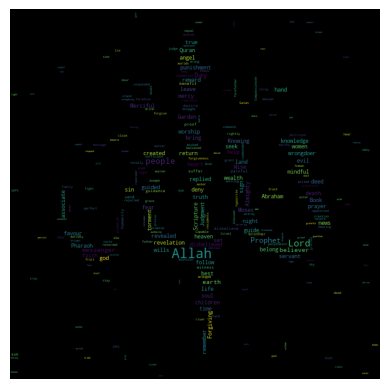

In [43]:
a_mask = np.array(Image.open("image-text.png"))
# def grey_color_func(word, font_size, position,orientation,random_state=None, **kwargs):
#     return("hsl(230,100%%, %d%%)" % np.random.randint(99,100))
# plt.figure(figsize=(11, 8))
wc = WordCloud(background_color="black",width=1000, height=800, max_words=1000, mask=a_mask,
               collocations=False,contour_color='black').generate(whole_quran)
plt.imshow(wc)
plt.axis('off')
plt.show()

# <p style="padding:17px;background-color:#89b8c4;margin:0;color:Black;border:1px outline #0d0c0d;font-family:Hiragino Sans;font-weight: bold;font-size:60%;overflow:hidden;font-weight:500">**I hope you liked this project. It's a wonderful project to invest our skills in. I've taken great care with the project, but if you find any mistakes kindly let me know, and I'll correct them immediately**</p>
